# select interesting genes


This notebook looks for interesting genes to be used in coculture mutant experiments with Alteromonas.


In [128]:
import pandas as pd
import numpy as np
import seaborn as sns

In [129]:
# look for late coculture
interesting_contrasts = [

    'C3vsC1_prot', 'C4vsC1_prot', 'C5vsC1_prot',
       'LATEvsC1_prot',  'LATEvsC1P1_rna',
       'C3vsC1_rna', 'C4vsC1_rna', 'C5vsC1_rna'
    
]

# Upload files

In [130]:
import os
os.listdir()

['.ipynb_checkpoints',
 'all-strains_reciprocal-best-hits.csv',
 'hota1a3 mutant selection.docx',
 'MIT2001-734 unique colonies with HOT1A3 mapping 18082025 v2.xlsx',
 'MIT2001-734 unique colonies with HOT1A3 mapping.xlsx',
 'MIT2001-734 unique colonies.xlsx',
 'N related  enzymes.xlsx',
 'ROS related  enzymes.xlsx',
 'select mutants.ipynb']

In [131]:
df_map = pd.read_csv( 'all-strains_reciprocal-best-hits.csv',)
df_map.head(3)

,MIT1002-mutant-library,MIT1002-used-for-model,ATCC27126_new,ATCC27126_old,HOT1A3_new,HOT1A3_old
0,MIT1002_00001,TK37_RS04860,MASE_RS00005,MASE_00005,ACZ81_RS00005,ACZ81_00005
1,MIT1002_00002,TK37_RS04855,MASE_RS00010,MASE_00010,ACZ81_RS00010,ACZ81_00010
2,MIT1002_00003,TK37_RS04850,MASE_RS00015,MASE_00015,ACZ81_RS00015,ACZ81_00015


In [132]:
ros_kos = pd.read_excel( 'ROS related  enzymes.xlsx',)

In [133]:
df_mutants = pd.read_excel( 'MIT2001-734 unique colonies.xlsx',)
df_mutants.head(3)

,Plate,barcode,Well,Let,Num,Read Count,Mcount_outof_TotalLibrary,number of Barcodes in Well,Percent of top barcode in Well,Barcode2- Second top barcode,...,n,n2,pos2,nPastEnd,BarcodePosPercent,locus_tag,product,locus_start,locus_end,Strand
0,25,GGGAGTCAAGGTAGGGGGGC,A18,A,18,304,0.000396,1,1.0,NaN,...,6,0,NaN,0,1.0,MIT1002_00003,DNA replication and repair protein RecF,2852.0,3940.0,+
1,12,CTTATTCGTATGTCTCCGCC,I19,I,19,1965,0.001696,1,1.0,NaN,...,1065,0,NaN,0,1.0,MIT1002_00009,Protein of unknown function (DUF2489),10924.0,11385.0,-
2,15,GTCTCCGTACGGACTGTTTT,N4,N,4,205,0.000175,1,1.0,NaN,...,2,0,NaN,0,1.0,MIT1002_00011,Methyltransferase domain-containing protein,12036.0,12737.0,-


In [134]:
dpath = '../Enrichment/DE_results'
os.listdir(dpath)

['HOT1A3_all_FC_results.csv',
 'HOT1A3_GOSEQ_results.csv',
 'HOT1A3_significant_paths.xlsx',
 'MED4_all_FC_results.csv',
 'MED4_de_genes_with_kegg.xlsx',
 'MED4_GOSEQ_results.csv']

In [135]:
de_genes = pd.read_csv(os.path.join(dpath,'HOT1A3_all_FC_results.csv'))
de_genes['score'] = -np.log10(de_genes['padj'])

de_genes.head(3)

,contrast,gene_id,logFC,AveExpr,pvalue,padj,Assay,contrast1,Length,down,up,score
0,C2 - C1,ACZ81_RS16015,1.536245,0.806205,4.418240e-08,0.000098,Proteome,C2vsC1_prot,1497,False,True,4.007616
1,C2 - C1,ACZ81_RS19455,1.564814,0.451880,1.133719e-07,0.000126,Proteome,C2vsC1_prot,1776,False,True,3.899390
2,C2 - C1,ACZ81_RS03205,1.851973,-0.934031,2.173784e-07,0.000161,Proteome,C2vsC1_prot,1758,False,True,3.792770


In [136]:
de_paths = pd.read_csv(os.path.join(dpath, 'HOT1A3_GOSEQ_results.csv',))
de_paths['score'] = -np.log10(de_paths['padj'])
de_paths.head(3)

,category,PATH,pathway,over_represented_pvalue,padj,under_represented_pvalue,numDEInCat,numInCat,main,Category,type,enrich,Assay,contrast,organism,sub,module,Group,score
0,9122,09122 Translation,Translation,1.299072e-15,2.598144e-14,1.000000,32,76,09120 Genetic Information Processing,Genetic,down,sub,prot,C2vsC1_prot,HOT1A3,09122 Translation,Translation,Coculture,13.585337
1,9105,09105 Amino acid metabolism,Amino acid metabolism,4.758852e-05,4.758852e-04,0.999981,34,170,09100 Metabolism,Metabolism,down,sub,prot,C2vsC1_prot,HOT1A3,09105 Amino acid metabolism,Amino acid,Coculture,3.322498
2,9102,09102 Energy metabolism,Energy metabolism,1.427825e-04,9.518832e-04,0.999953,22,96,09100 Metabolism,Metabolism,down,sub,prot,C2vsC1_prot,HOT1A3,09102 Energy metabolism,Energy,Coculture,3.021416


In [137]:
df_counts = pd.read_csv(os.path.join('..', 'RNASEQ', 'data', 'HOT1A3_counts_combined.txt'), sep='\t')
df_pathways  = pd.read_csv(os.path.join('..', 'genomes', 'HOT1A3', 'HOT1A3_pathways.csv'))
df_counts.head()

,gene_id,gene,product,protein_id,old_locus_tag,A1A_S7,A1B_S8,A1C_S9,A2A_S10,A2B_S11,...,C5A_S32,C5B_S33,C5C_S34,Mock_S35,P6A_S1,P6B_S2,P6C_S3,P7A_S4,P7B_S5,P7C_S6
0,ACZ81_RS00005,dnaA,chromosomal replication initiator protein DnaA,WP_232375975.1,NaN,5962,6211,1340,2294,7210,...,4223,5758,4907,3285,0,0,0,0,0,0
1,ACZ81_RS00010,dnaN,DNA polymerase III subunit beta,WP_012516526.1,NaN,3590,2898,784,769,2761,...,1840,2191,1626,536,0,0,0,0,0,0
2,ACZ81_RS00015,recF,DNA replication/repair protein RecF,WP_061438857.1,NaN,806,756,203,284,613,...,504,600,368,155,0,0,0,0,0,0
3,ACZ81_RS00020,gyrB,DNA topoisomerase (ATP-hydrolyzing) subunit B,WP_014977848.1,NaN,5336,3735,960,1092,3754,...,2491,3503,3177,1119,0,0,0,0,0,0
4,ACZ81_RS00025,NaN,hypothetical protein,WP_039234509.1,NaN,171,106,63,73,185,...,119,170,96,58,0,0,0,0,0,0


In [138]:
df_pathways.head()

,Unnamed: 0,protein_id,path_id,main,sub,path,ecpath
0,0,WP_004588585.1,NaN,NaN,NaN,NaN,NaN
1,1,WP_006991848.1,NaN,NaN,NaN,NaN,NaN
2,2,WP_010179497.1,K02946,09120 Genetic Information Processing,09122 Translation,03010 Ribosome [PATH:ko03010],"K02946 RP-S10, MRPS10, rpsJ; small subunit ri..."
3,3,WP_010179497.1,K02946,09180 Brite Hierarchies,09182 Protein families: genetic information pr...,03011 Ribosome [BR:ko03011],"K02946 RP-S10, MRPS10, rpsJ; small subunit ri..."
4,4,WP_012516526.1,K02338,09120 Genetic Information Processing,09124 Replication and repair,03030 DNA replication [PATH:ko03030],K02338 dnaN; DNA polymerase III subunit beta ...


# find upregulated genes and pathways

In [139]:
de_paths_significant = de_paths.loc[
    de_paths.Group.isin(['Coculture']) & 
    de_paths.enrich.isin(['path']) & 
    de_paths.type.isin(['up']) & 
    de_paths.contrast.isin(interesting_contrasts) &
    de_paths.padj.le(0.05)

]

In [140]:
de_genes_significant = de_genes.loc[
    de_genes.contrast1.isin(interesting_contrasts) &
    de_genes.padj.le(0.05)  &
    de_genes.up

]

In [141]:
significant_genes = de_genes_significant.gene_id.value_counts().reset_index()
significant_genes


,gene_id,count
0,ACZ81_RS12895,8
1,ACZ81_RS12900,8
2,ACZ81_RS17965,8
3,ACZ81_RS07445,8
4,ACZ81_RS16855,8
...,...,...
1322,ACZ81_RS05830,1
1323,ACZ81_RS05640,1
1324,ACZ81_RS05470,1
1325,ACZ81_RS05220,1


In [142]:
significant_paths = de_paths_significant.PATH.value_counts().reset_index()
significant_paths


,PATH,count
0,00240 Pyrimidine metabolism [PATH:ko00240],4
1,00910 Nitrogen metabolism [PATH:ko00910],3
2,03010 Ribosome [PATH:ko03010],3
3,"00280 Valine, leucine and isoleucine degradati...",2
4,00300 Lysine biosynthesis [PATH:ko00300],2
5,00362 Benzoate degradation [PATH:ko00362],1
6,00071 Fatty acid degradation [PATH:ko00071],1
7,00500 Starch and sucrose metabolism [PATH:ko00...,1
8,00061 Fatty acid biosynthesis [PATH:ko00061],1
9,00780 Biotin metabolism [PATH:ko00780],1


In [143]:
de_paths_significant.T

,797,798,799,1019,1020,1694,1695,2894,2895,2896,...,3136,3137,3374,3375,3376,3377,3378,3379,3380,3381
category,280,362,71,280,500,910,240,3010,61,240,...,300,240,3010,240,195,740,300,910,900,190
PATH,"00280 Valine, leucine and isoleucine degradati...",00362 Benzoate degradation [PATH:ko00362],00071 Fatty acid degradation [PATH:ko00071],"00280 Valine, leucine and isoleucine degradati...",00500 Starch and sucrose metabolism [PATH:ko00...,00910 Nitrogen metabolism [PATH:ko00910],00240 Pyrimidine metabolism [PATH:ko00240],03010 Ribosome [PATH:ko03010],00061 Fatty acid biosynthesis [PATH:ko00061],00240 Pyrimidine metabolism [PATH:ko00240],...,00300 Lysine biosynthesis [PATH:ko00300],00240 Pyrimidine metabolism [PATH:ko00240],03010 Ribosome [PATH:ko03010],00240 Pyrimidine metabolism [PATH:ko00240],00195 Photosynthesis [PATH:ko00195],00740 Riboflavin metabolism [PATH:ko00740],00300 Lysine biosynthesis [PATH:ko00300],00910 Nitrogen metabolism [PATH:ko00910],00900 Terpenoid backbone biosynthesis [PATH:ko...,00190 Oxidative phosphorylation [PATH:ko00190]
pathway,"Valine, leucine and isoleucine degradation",Benzoate degradation,Fatty acid degradation,"Valine, leucine and isoleucine degradation",Starch and sucrose metabolism,Nitrogen metabolism,Pyrimidine metabolism,Ribosome,Fatty acid biosynthesis,Pyrimidine metabolism,...,Lysine biosynthesis,Pyrimidine metabolism,Ribosome,Pyrimidine metabolism,Photosynthesis,Riboflavin metabolism,Lysine biosynthesis,Nitrogen metabolism,Terpenoid backbone biosynthesis,Oxidative phosphorylation
over_represented_pvalue,0.000003,0.000397,0.001402,0.000694,0.000951,0.0,0.000147,0.0,0.0,0.000001,...,0.001931,0.00198,0.0,0.0,0.000012,0.00034,0.000629,0.000646,0.00075,0.001395
padj,0.000229,0.018081,0.042524,0.043257,0.043257,0.000007,0.007346,0.0,0.00001,0.000026,...,0.049507,0.049507,0.0,0.0,0.000393,0.008502,0.010717,0.010717,0.010717,0.017442
under_represented_pvalue,1.0,0.99997,0.999739,0.999839,0.999832,1.0,0.999983,1.0,1.0,1.0,...,0.999679,0.999446,1.0,1.0,1.0,0.999971,0.999908,0.999923,0.999903,0.999598
numDEInCat,19,9,12,15,12,8,7,36,14,18,...,8,13,37,20,7,7,9,8,8,14
numInCat,26,11,18,26,18,13,33,54,20,33,...,16,33,54,33,8,11,16,13,14,38
main,09100 Metabolism,09100 Metabolism,09100 Metabolism,09100 Metabolism,09100 Metabolism,09100 Metabolism,09100 Metabolism,09120 Genetic Information Processing,09100 Metabolism,09100 Metabolism,...,09100 Metabolism,09100 Metabolism,09120 Genetic Information Processing,09100 Metabolism,09100 Metabolism,09100 Metabolism,09100 Metabolism,09100 Metabolism,09100 Metabolism,09100 Metabolism
Category,Metabolism,Metabolism,Metabolism,Metabolism,Metabolism,Metabolism,Metabolism,Genetic,Metabolism,Metabolism,...,Metabolism,Metabolism,Genetic,Metabolism,Metabolism,Metabolism,Metabolism,Metabolism,Metabolism,Metabolism


<Axes: xlabel='type-Assay-contrast', ylabel='Category-PATH'>

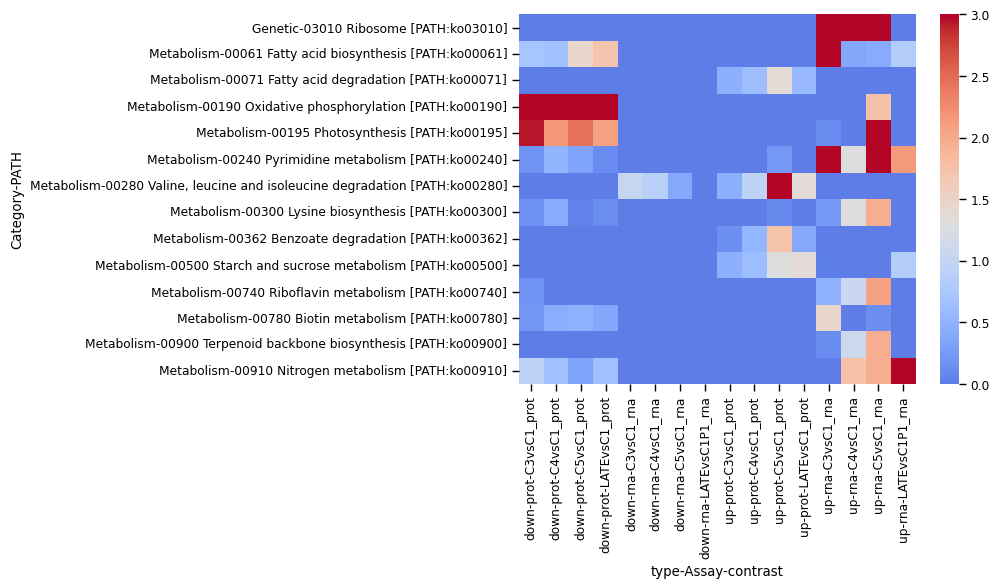

In [144]:
pde_paths = de_paths.loc[de_paths.PATH.isin(significant_paths.PATH) & de_paths.contrast.isin(interesting_contrasts)].pivot_table(
    index=['Category', 'PATH'], 
    columns=['type','Assay', 'contrast'],
    values='score'
)

sns.set_context('paper')
sns.heatmap(pde_paths, cmap='coolwarm', center = -np.log10(0.05), vmin =0, vmax=3)


In [145]:
de_genes.loc[de_genes.gene_id.isin(significant_genes.gene_id) & de_genes.contrast1.isin(interesting_contrasts)].nsmallest(20,'padj')

,contrast,gene_id,logFC,AveExpr,pvalue,padj,Assay,contrast1,Length,down,up,score
18022,treatment_long.term_vs_ref,ACZ81_RS12900,6.082854,4365.680691,4.379152e-182,1.724072e-178,RNA,LATEvsC1P1_rna,1707,False,True,177.763445
18021,treatment_long.term_vs_ref,ACZ81_RS12895,4.674927,3478.429157,9.759504e-132,1.921158e-128,RNA,LATEvsC1P1_rna,1701,False,True,127.716437
18633,treatment_long.term_vs_ref,ACZ81_RS16055,5.196895,2793.213359,1.753472e-126,2.301139e-123,RNA,LATEvsC1P1_rna,1131,False,True,122.638057
42112,C4vsC1,ACZ81_RS12900,6.147477,4022.410455,1.257311e-112,5.044331e-109,RNA,C4vsC1_rna,1707,False,True,108.297196
38097,C3vsC1,ACZ81_RS12900,5.996377,4022.410455,2.700181e-107,1.083313e-103,RNA,C3vsC1_rna,1707,False,True,102.965246
46127,C5vsC1,ACZ81_RS12900,5.071425,4022.410455,3.173551e-77,6.366144e-74,RNA,C5vsC1_rna,1707,False,True,73.196124
40648,C4vsC1,ACZ81_RS05065,-4.657709,14679.790512,8.408637e-57,1.124515e-53,RNA,C4vsC1_rna,837,True,False,52.949035
38096,C3vsC1,ACZ81_RS12895,4.835971,3217.521269,2.371390e-55,3.171339e-52,RNA,C3vsC1_rna,1701,False,True,51.498757
42111,C4vsC1,ACZ81_RS12895,4.544737,3217.521269,4.618881e-49,4.632737e-46,RNA,C4vsC1_rna,1701,False,True,45.334162
38708,C3vsC1,ACZ81_RS16055,4.822338,2612.759739,9.399608e-44,9.427807e-41,RNA,C3vsC1_rna,1131,False,True,40.025589


In [146]:

significant_genes['count'].value_counts()

count
1    391
3    325
4    285
2    212
5     56
6     31
7     16
8     11
Name: count, dtype: int64

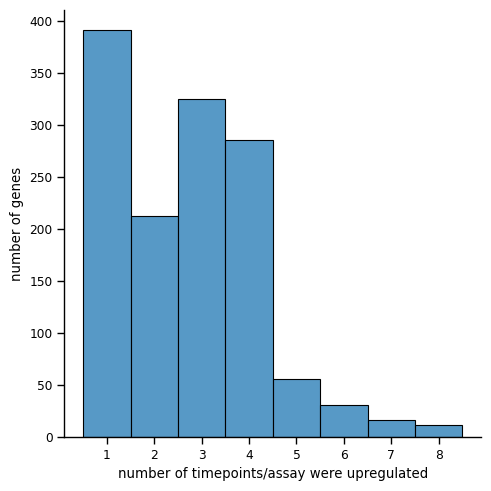

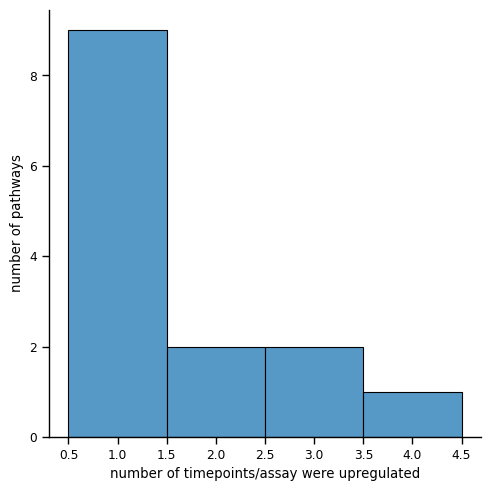

In [147]:
g = sns.displot(significant_genes['count'], discrete=True)
g.set(xlabel='number of timepoints/assay were upregulated', ylabel='number of genes')
g = sns.displot(significant_paths['count'], discrete=True)
g.set(xlabel='number of timepoints/assay were upregulated', ylabel='number of pathways')


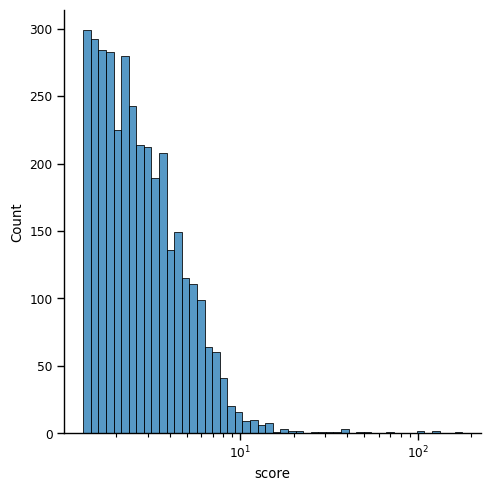

In [148]:
sns.displot(de_genes_significant.score, log_scale=True)

# Select genes/pathways

In [149]:
selected_pathways = significant_paths.loc[significant_paths['count'].ge(2)]

In [150]:
selected_genes = significant_genes.loc[significant_genes['count'].ge(5)]

In [151]:
df1 = pd.merge (df_counts[['gene_id', 'gene', 'product', 'protein_id']], df_pathways[['protein_id',  'path', 'path_id']], how='left', on='protein_id') 


In [152]:
df2 = pd.merge(df1, df_map[['MIT1002-mutant-library', 'HOT1A3_new']], left_on='gene_id', right_on='HOT1A3_new')


In [153]:
genes_in_selected_pathways = df2.loc[df2.path.isin(selected_pathways.PATH)].drop_duplicates('gene_id')

In [154]:
genes_in_upregulated_pathways = df2.loc[df2.path.isin(significant_paths.PATH)].drop_duplicates('gene_id')

In [155]:
genes_in_ROS_pathways = df2.loc[df2.path_id.isin(ros_kos.KO)].drop_duplicates('gene_id')


In [156]:
# limit to those which are also upregulated
genes_in_selected_pathways_upregulated = genes_in_selected_pathways.loc[genes_in_selected_pathways.gene_id.isin(significant_genes.gene_id)]


In [157]:
genes_in_selected_pathways_upregulated

,gene_id,gene,product,protein_id,path,path_id,MIT1002-mutant-library,HOT1A3_new
73,ACZ81_RS00265,rpmB,50S ribosomal protein L28,WP_014947757.1,03010 Ribosome [PATH:ko03010],K02902,MIT1002_00054,ACZ81_RS00265
75,ACZ81_RS00270,rpmG,50S ribosomal protein L33,WP_012516577.1,03010 Ribosome [PATH:ko03010],K02913,MIT1002_00055,ACZ81_RS00270
235,ACZ81_RS00845,lysA,diaminopimelate decarboxylase,WP_014977968.1,00300 Lysine biosynthesis [PATH:ko00300],K01586,MIT1002_00160,ACZ81_RS00845
262,ACZ81_RS00905,NaN,dihydrodipicolinate synthase family protein,WP_061439033.1,00300 Lysine biosynthesis [PATH:ko00300],K01714,MIT1002_00172,ACZ81_RS00905
463,ACZ81_RS01625,NaN,branched-chain amino acid aminotransferase,WP_061439204.1,"00280 Valine, leucine and isoleucine degradati...",K00826,MIT1002_00377,ACZ81_RS01625
...,...,...,...,...,...,...,...,...
5410,ACZ81_RS18035,rplA,50S ribosomal protein L1,WP_014951042.1,03010 Ribosome [PATH:ko03010],K02863,MIT1002_03736,ACZ81_RS18035
5412,ACZ81_RS18040,rplK,50S ribosomal protein L11,WP_014951043.1,03010 Ribosome [PATH:ko03010],K02867,MIT1002_03737,ACZ81_RS18040
5530,ACZ81_RS18455,rpsF,30S ribosomal protein S6,WP_014951120.1,03010 Ribosome [PATH:ko03010],K02990,MIT1002_03818,ACZ81_RS18455
5902,ACZ81_RS19750,pyrE,orotate phosphoribosyltransferase,WP_039228851.1,00240 Pyrimidine metabolism [PATH:ko00240],K00762,MIT1002_04070,ACZ81_RS19750


In [158]:
selected_genes

,gene_id,count
0,ACZ81_RS12895,8
1,ACZ81_RS12900,8
2,ACZ81_RS17965,8
3,ACZ81_RS07445,8
4,ACZ81_RS16855,8
...,...,...
109,ACZ81_RS15400,5
110,ACZ81_RS00725,5
111,ACZ81_RS11725,5
112,ACZ81_RS00310,5


In [159]:
genes_in_ROS_pathways.shape

(16, 8)

In [160]:
len(set(selected_genes.gene_id) | set(genes_in_selected_pathways.gene_id)| set(genes_in_ROS_pathways.gene_id) )


263

In [161]:
genes_in_selected_pathways.loc[genes_in_selected_pathways.gene_id.isin(significant_genes.gene_id)]

,gene_id,gene,product,protein_id,path,path_id,MIT1002-mutant-library,HOT1A3_new
73,ACZ81_RS00265,rpmB,50S ribosomal protein L28,WP_014947757.1,03010 Ribosome [PATH:ko03010],K02902,MIT1002_00054,ACZ81_RS00265
75,ACZ81_RS00270,rpmG,50S ribosomal protein L33,WP_012516577.1,03010 Ribosome [PATH:ko03010],K02913,MIT1002_00055,ACZ81_RS00270
235,ACZ81_RS00845,lysA,diaminopimelate decarboxylase,WP_014977968.1,00300 Lysine biosynthesis [PATH:ko00300],K01586,MIT1002_00160,ACZ81_RS00845
262,ACZ81_RS00905,NaN,dihydrodipicolinate synthase family protein,WP_061439033.1,00300 Lysine biosynthesis [PATH:ko00300],K01714,MIT1002_00172,ACZ81_RS00905
463,ACZ81_RS01625,NaN,branched-chain amino acid aminotransferase,WP_061439204.1,"00280 Valine, leucine and isoleucine degradati...",K00826,MIT1002_00377,ACZ81_RS01625
...,...,...,...,...,...,...,...,...
5410,ACZ81_RS18035,rplA,50S ribosomal protein L1,WP_014951042.1,03010 Ribosome [PATH:ko03010],K02863,MIT1002_03736,ACZ81_RS18035
5412,ACZ81_RS18040,rplK,50S ribosomal protein L11,WP_014951043.1,03010 Ribosome [PATH:ko03010],K02867,MIT1002_03737,ACZ81_RS18040
5530,ACZ81_RS18455,rpsF,30S ribosomal protein S6,WP_014951120.1,03010 Ribosome [PATH:ko03010],K02990,MIT1002_03818,ACZ81_RS18455
5902,ACZ81_RS19750,pyrE,orotate phosphoribosyltransferase,WP_039228851.1,00240 Pyrimidine metabolism [PATH:ko00240],K00762,MIT1002_04070,ACZ81_RS19750


In [162]:
pd.merge(significant_paths, de_paths_significant, on='PATH').drop_duplicates('PATH')[['Category', 'PATH', 'count', 'numDEInCat', 'numInCat' ]]

,Category,PATH,count,numDEInCat,numInCat
0,Metabolism,00240 Pyrimidine metabolism [PATH:ko00240],4,7,33
4,Metabolism,00910 Nitrogen metabolism [PATH:ko00910],3,8,13
7,Genetic,03010 Ribosome [PATH:ko03010],3,36,54
10,Metabolism,"00280 Valine, leucine and isoleucine degradati...",2,19,26
12,Metabolism,00300 Lysine biosynthesis [PATH:ko00300],2,8,16
14,Metabolism,00362 Benzoate degradation [PATH:ko00362],1,9,11
15,Metabolism,00071 Fatty acid degradation [PATH:ko00071],1,12,18
16,Metabolism,00500 Starch and sucrose metabolism [PATH:ko00...,1,12,18
17,Metabolism,00061 Fatty acid biosynthesis [PATH:ko00061],1,14,20
18,Metabolism,00780 Biotin metabolism [PATH:ko00780],1,7,12


In [163]:
selected_genes = pd.merge(selected_genes, df_map[['MIT1002-mutant-library', 'HOT1A3_new']], left_on='gene_id', right_on='HOT1A3_new')

In [164]:
df_mutants_with_1A3 = pd.merge(df_mutants, df_map[['MIT1002-mutant-library', 'HOT1A3_new']], left_on='locus_tag', right_on='MIT1002-mutant-library', how='left')


In [165]:
df_mutants.shape, df_mutants_with_1A3.shape

((734, 26), (734, 28))

In [166]:
df_mutants_with_1A3.isna().sum()

Plate                                      0
barcode                                    0
Well                                       0
Let                                        0
Num                                        0
Read Count                                 0
Mcount_outof_TotalLibrary                  0
number of Barcodes in Well                 0
Percent of top barcode in Well             0
Barcode2- Second top barcode             464
Read Count- Second barcode               464
Percent of second top barcode in Well    464
pos                                        0
scaffold                                   0
orientation_transposon_integration         0
nTot                                       0
n                                          0
n2                                         0
pos2                                     667
nPastEnd                                   0
BarcodePosPercent                          0
locus_tag                                  0
product   

In [167]:
df_mutants_with_1A3_paths = pd.merge(df_mutants_with_1A3, genes_in_selected_pathways_upregulated[['MIT1002-mutant-library', 'path']], 
    on='MIT1002-mutant-library', how='left', suffixes=['', ' in select upregulated pathways (upregulated genes)'])


In [168]:
df_mutants_with_1A3_paths2 = pd.merge(
    df_mutants_with_1A3_paths, genes_in_selected_pathways[['MIT1002-mutant-library', 'path']], 
    on='MIT1002-mutant-library', how='left', suffixes=['', ' in select upregulated pathways (all genes)'])


In [169]:
df_mutants_with_1A3_paths3 = pd.merge(
    df_mutants_with_1A3_paths2, genes_in_upregulated_pathways[['MIT1002-mutant-library', 'path']], 
    on='MIT1002-mutant-library', how='left', suffixes=['', ' in all upregulated pathways (all genes)'])


In [170]:
significant_genes1 = significant_genes.set_index('gene_id')
significant_genes1

,count
gene_id,
ACZ81_RS12895,8
ACZ81_RS12900,8
ACZ81_RS17965,8
ACZ81_RS07445,8
ACZ81_RS16855,8
...,...
ACZ81_RS05830,1
ACZ81_RS05640,1
ACZ81_RS05470,1


In [171]:
df_mutants_with_1A3_paths3['upregulated timepoints/assay'] = df_mutants_with_1A3_paths3.HOT1A3_new.map(significant_genes1['count'])

In [172]:
selected_genes[selected_genes['MIT1002-mutant-library'].isna()]

,gene_id,count,MIT1002-mutant-library,HOT1A3_new
10,ACZ81_RS17215,8,NaN,ACZ81_RS17215
24,ACZ81_RS02205,7,NaN,ACZ81_RS02205
92,ACZ81_RS17120,5,NaN,ACZ81_RS17120
99,ACZ81_RS09035,5,NaN,ACZ81_RS09035


In [173]:
df_mutants_with_1A3_paths3.head().T

,0,1,2,3,4
Plate,25,12,15,10,10
barcode,GGGAGTCAAGGTAGGGGGGC,CTTATTCGTATGTCTCCGCC,GTCTCCGTACGGACTGTTTT,GGGGTGGACTGTTAAGGTCT,ACTAGATTGAGTCCTGTGAG
Well,A18,I19,N4,D23,M13
Let,A,I,N,D,M
Num,18,19,4,23,13
Read Count,304,1965,205,104,303
Mcount_outof_TotalLibrary,0.000396,0.001696,0.000175,0.000362,0.001054
number of Barcodes in Well,1,1,1,1,3
Percent of top barcode in Well,1.0,1.0,1.0,1.0,0.706294
Barcode2- Second top barcode,NaN,NaN,NaN,NaN,GGGGGTTCTCGCCGGCTCGG


In [174]:
(~df_mutants_with_1A3_paths3.path.isna()).sum()

13

In [175]:
df_mutants_with_1A3_paths3.path.value_counts()

path
00910 Nitrogen metabolism [PATH:ko00910]                           4
00300 Lysine biosynthesis [PATH:ko00300]                           3
00280 Valine, leucine and isoleucine degradation [PATH:ko00280]    3
00240 Pyrimidine metabolism [PATH:ko00240]                         2
03010 Ribosome [PATH:ko03010]                                      1
Name: count, dtype: int64

In [176]:
df_mutants_with_1A3_paths3['selected based on upregulation'] = np.NaN
df_mutants_with_1A3_paths3.loc[df_mutants_with_1A3_paths3.HOT1A3_new.isin(selected_genes.HOT1A3_new), 'selected based on upregulation'] = 'Yes'

C:\Users\oweisberg\AppData\Local\Temp\ipykernel_25412\1930743163.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Yes' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_mutants_with_1A3_paths3.loc[df_mutants_with_1A3_paths3.HOT1A3_new.isin(selected_genes.HOT1A3_new), 'selected based on upregulation'] = 'Yes'


In [177]:
df_mutants_with_1A3_paths3['ROS enzyme'] = np.NaN
df_mutants_with_1A3_paths3.loc[df_mutants_with_1A3_paths3.HOT1A3_new.isin(genes_in_ROS_pathways.gene_id), 'ROS enzyme'] = 'Yes'

C:\Users\oweisberg\AppData\Local\Temp\ipykernel_25412\1159069329.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Yes' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_mutants_with_1A3_paths3.loc[df_mutants_with_1A3_paths3.HOT1A3_new.isin(genes_in_ROS_pathways.gene_id), 'ROS enzyme'] = 'Yes'


In [178]:
df_mutants_with_1A3_paths3['selected based on upregulation'].value_counts()


selected based on upregulation
Yes    20
Name: count, dtype: int64

In [179]:
df_mutants_with_1A3_paths3['ROS enzyme'].value_counts()


ROS enzyme
Yes    2
Name: count, dtype: int64

In [180]:
df_mutants_with_1A3_paths.loc[
(~df_mutants_with_1A3_paths3.path.isna()) |
(~df_mutants_with_1A3_paths3['selected based on upregulation'].isna()) |
(~df_mutants_with_1A3_paths3['ROS enzyme'].isna())

]

,Plate,barcode,Well,Let,Num,Read Count,Mcount_outof_TotalLibrary,number of Barcodes in Well,Percent of top barcode in Well,Barcode2- Second top barcode,...,nPastEnd,BarcodePosPercent,locus_tag,product,locus_start,locus_end,Strand,MIT1002-mutant-library,HOT1A3_new,path
20,24,GTGCAGGGGGGCCCATAACC,L8,L,8,1158,0.002663,1,1.000000,NaN,...,0,1.000000,MIT1002_00063,2-amino-3-ketobutyrate coenzyme A ligase,68853.0,70049.0,+,MIT1002_00063,ACZ81_RS00310,NaN
53,25,GTGCATTTGATAGCGAAGTG,C6,C,6,874,0.001137,1,1.000000,NaN,...,0,1.000000,MIT1002_00160,diaminopimelate decarboxylase,176524.0,177774.0,-,MIT1002_00160,ACZ81_RS00845,00300 Lysine biosynthesis [PATH:ko00300]
127,15,CTACGTAAGGGCAGGTGTAA,J24,J,24,2026,0.001725,2,0.964762,CTACGTAAGGGCAGGTGTAC,...,0,1.000000,MIT1002_00365,Sugar phosphate isomerase/epimerase,393568.0,394635.0,+,MIT1002_00365,ACZ81_RS01565,NaN
140,10,TAATTGCCACTTGAAAATAG,M6,M,6,207,0.000720,1,1.000000,NaN,...,0,0.936102,MIT1002_00423,aspartate carbamoyltransferase,457721.0,458734.0,-,MIT1002_00423,ACZ81_RS01845,00240 Pyrimidine metabolism [PATH:ko00240]
149,28,TGTGGCCCAGGCGCCAAAAA,B7,B,7,64,0.001867,1,1.000000,NaN,...,0,1.000000,MIT1002_00461,catalase,505626.0,507101.0,+,MIT1002_00461,ACZ81_RS02015,NaN
183,5,CGGTAGGGAGGGGGGGTGCG,E3,E,3,42,0.000108,4,0.347107,ACTGCGCGCGGGCGAGGGAG,...,0,0.997932,MIT1002_00575,3-hydroxyacyl-CoA dehydrogenase / enoyl-CoA hy...,618633.0,620783.0,-,MIT1002_00575,ACZ81_RS02650,"00280 Valine, leucine and isoleucine degradati..."
195,11,GTAGGGTATGTTGTAGCATA,N13,N,13,2874,0.002162,1,1.000000,NaN,...,0,0.982249,MIT1002_00648,"PTSINtr with GAF domain, PtsP",702840.0,705158.0,+,MIT1002_00648,ACZ81_RS02810,NaN
206,26,ATGGCTGCCGGCGTACGGGA,C20,C,20,57,0.000089,1,1.000000,NaN,...,0,1.000000,MIT1002_00700,assimilatory nitrate reductase catalytic subunit,765944.0,768853.0,+,MIT1002_00700,ACZ81_RS03120,00910 Nitrogen metabolism [PATH:ko00910]
207,14,ATTACTTTTAGCAGCGAGGC,K23,K,23,1152,0.001397,1,1.000000,NaN,...,0,1.000000,MIT1002_00710,nitrate/nitrite transport system permease protein,777754.0,778749.0,+,MIT1002_00710,ACZ81_RS03155,00910 Nitrogen metabolism [PATH:ko00910]
208,11,AGGTGCAACTAGGGGGCGCA,I17,I,17,2079,0.001564,1,1.000000,NaN,...,0,1.000000,MIT1002_00711,nitrate/nitrite transport system ATP-binding p...,778766.0,779668.0,+,MIT1002_00711,ACZ81_RS03160,00910 Nitrogen metabolism [PATH:ko00910]


In [181]:
df_mutants_with_1A3_paths3.rename(columns={'path': 'path in select upregulated pathways (upregulated gene)'}, inplace=True)

In [182]:
df_mutants_with_1A3_paths3.columns

Index(['Plate', 'barcode', 'Well', 'Let', 'Num', 'Read Count',
       'Mcount_outof_TotalLibrary', 'number of Barcodes in Well',
       'Percent of top barcode in Well', 'Barcode2- Second top barcode',
       'Read Count- Second barcode', 'Percent of second top barcode in Well',
       'pos', 'scaffold', 'orientation_transposon_integration', 'nTot', 'n',
       'n2', 'pos2', 'nPastEnd', 'BarcodePosPercent', 'locus_tag', 'product',
       'locus_start', 'locus_end', 'Strand', 'MIT1002-mutant-library',
       'HOT1A3_new', 'path in select upregulated pathways (upregulated gene)',
       'path in select upregulated pathways (all genes)',
       'path in all upregulated pathways (all genes)',
       'upregulated timepoints/assay', 'selected based on upregulation',
       'ROS enzyme'],
      dtype='object')

In [183]:
selection_cols = ['path in select upregulated pathways (upregulated gene)',
       'path in select upregulated pathways (all genes)',
       'path in all upregulated pathways (all genes)',
       'selected based on upregulation', 'ROS enzyme']
(~df_mutants_with_1A3_paths3[selection_cols].isna()).any(axis=1).sum()

66

In [184]:
df_mutants_with_1A3_paths3['selected gene'] = np.NaN
df_mutants_with_1A3_paths3.loc[(~df_mutants_with_1A3_paths3[selection_cols].isna()).any(axis=1), 'selected gene'] = 'Yes'

C:\Users\oweisberg\AppData\Local\Temp\ipykernel_25412\2144224979.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Yes' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_mutants_with_1A3_paths3.loc[(~df_mutants_with_1A3_paths3[selection_cols].isna()).any(axis=1), 'selected gene'] = 'Yes'


In [185]:
df_mutants_with_1A3_paths3.to_excel( 'MIT2001-734 unique colonies with HOT1A3 mapping 18082025 v2.xlsx',)

In [186]:
(~genes_in_selected_pathways_upregulated['MIT1002-mutant-library'].isna()).sum()

99

In [187]:
(~genes_in_ROS_pathways['MIT1002-mutant-library'].isna()).sum()

16

In [188]:
(~selected_genes['MIT1002-mutant-library'].isna()).sum()

110